#  **Profit Estimation Using Manual Multilinear Regression**

In [226]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [227]:
df = pd.read_csv("50_Startups_dataset.csv",index_col = 0)
df.describe()


,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.715600,121344.739600,211025.197800,112012.739200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.100000,51283.240000,0.100000,14681.500000
25%,39936.470000,103730.975000,129300.232500,90139.002500
50%,73051.180000,122699.895000,212716.340000,107978.290000
75%,101602.900000,144842.280000,299469.185000,139766.077500
max,165349.300000,182645.660000,471784.200000,192261.930000


In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.3+ KB


In [229]:
df.duplicated().sum()

0

<Axes: >

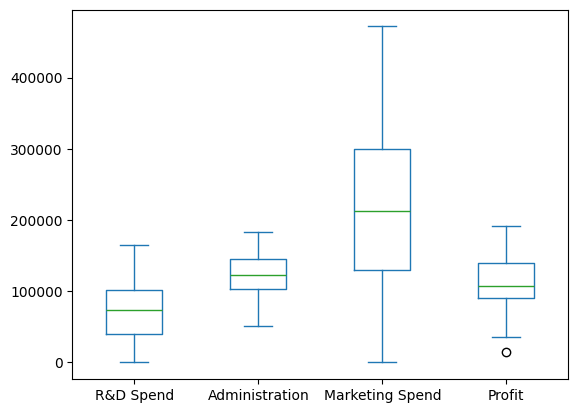

In [230]:
df.plot(kind="box")


In [231]:

df[['R&D Spend', 'Administration','Marketing Spend','Profit']].corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [232]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.715600,121344.739600,211025.197800,112012.739200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.100000,51283.240000,0.100000,14681.500000
25%,39936.470000,103730.975000,129300.232500,90139.002500
50%,73051.180000,122699.895000,212716.340000,107978.290000
75%,101602.900000,144842.280000,299469.185000,139766.077500
max,165349.300000,182645.660000,471784.200000,192261.930000


In [233]:

IQR = df.Profit.quantile(0.75) - df.Profit.quantile(0.25)
upper_fence = df.Profit.quantile(0.75) + 1.5*IQR
lower_fence = df.Profit.quantile(0.25) - 1.5*IQR
print(upper_fence, lower_fence)

214206.69000000003 15698.389999999985


<Axes: >

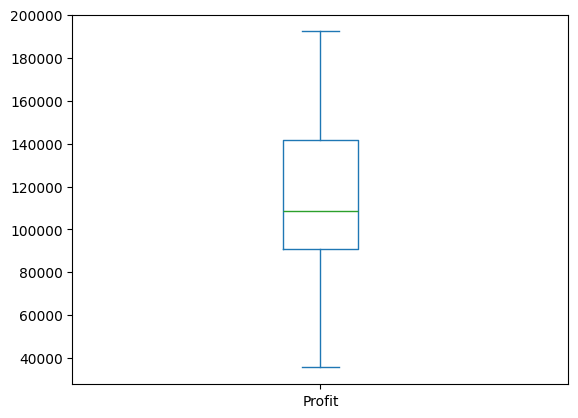

In [234]:
outlier = df.loc[(df['Profit'] < lower_fence)]
df = df.drop(outlier.index)
df.Profit.plot(kind="box")

In [235]:
y = np.array(df['Profit'])
df.drop('Profit', axis=1, inplace = True)
df.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.30,136897.90,471784.20,New York
1,162597.80,151377.69,443898.63,California
2,153441.61,101145.65,407934.64,Florida
3,144372.51,118671.95,383199.72,New York
4,142107.44,91391.87,366168.52,Florida


In [236]:
df['State'].value_counts()

State
New York      17
California    16
Florida       16
Name: count, dtype: int64

In [238]:
Locations = ['New York', 'California']
df[Locations] = 0
df.head()

,R&D Spend,Administration,Marketing Spend,State,New York,California
0,165349.30,136897.90,471784.20,New York,0,0
1,162597.80,151377.69,443898.63,California,0,0
2,153441.61,101145.65,407934.64,Florida,0,0
3,144372.51,118671.95,383199.72,New York,0,0
4,142107.44,91391.87,366168.52,Florida,0,0


In [239]:
df['New York'] = df.apply(lambda x: 1 if x['State'] == 'New York' else 0, axis=1)
df['California'] = df.apply(lambda x: 1 if x['State'] =='California' else 0, axis = 1)
df.drop(columns = 'State',axis = 1, inplace = True)
df.sample(5)


,R&D Spend,Administration,Marketing Spend,New York,California
1,162597.80,151377.69,443898.63,0,1
24,77044.11,99281.44,140574.91,1,0
39,38558.61,82982.19,174999.40,0,1
21,78389.57,153773.53,299737.39,1,0
41,27893.02,84710.87,164470.81,0,0


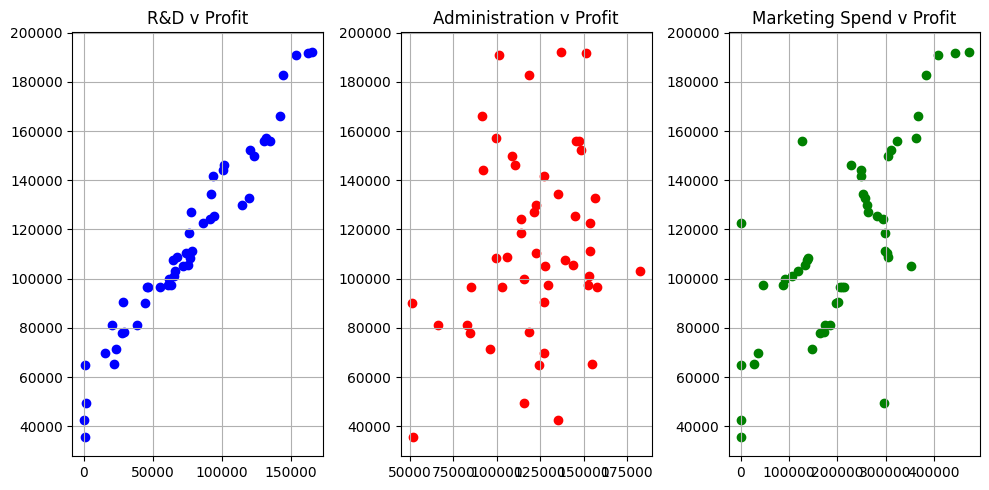

In [240]:

fig, axes = plt.subplots(1, 3, figsize=(10,5)) 

# First plot
axes[0].scatter(df['R&D Spend'],y, label='R&D v Profit', color='blue')
axes[0].set_title("R&D v Profit")
axes[0].grid(True)

# Second plot
axes[1].scatter(df['Administration'], y, label='Administration v Profit', color='red')
axes[1].set_title("Administration v Profit")
axes[1].grid(True)


# Second plot
axes[2].scatter(df['Marketing Spend'], y, label='Marketing Spend v Profit', color='green')
axes[2].set_title("Marketing Spend v Profit")
axes[2].grid(True)

plt.tight_layout()  # Adjust spacing
plt.show()

In [241]:
x = np.array(df.values)
y = y.reshape(len(y),1)
print("The shape of the independent feature are ",x.shape)
print("The shape of the dependent feature are ",y.shape)

The shape of the independent feature are  (49, 5)
The shape of the dependent feature are  (49, 1)


In [242]:
from numpy.linalg import inv 

def Regression_model(x, y):
    # Get the shape of x
    (n, p_minus_one) = x.shape
    p = p_minus_one + 1
    
   
    new_x = np.ones(shape=(n, p))
    new_x[:, 1:] = x 
    
  
    coefficients = np.dot(np.dot(inv(np.dot(new_x.T, new_x)), new_x.T), y)
    
   
    y_pred = np.dot(new_x, coefficients)

    return coefficients, y_pred
    
    

In [243]:
coeff, profit_pred = Regression_model(df, y)
profit_pred = profit_pred.round(2)
x = df.copy()
x['Profit'] = y
x['y_pred'] = profit_pred
x.sample(5)



,R&D Spend,Administration,Marketing Spend,New York,California,Profit,y_pred
27,72107.70,127864.65,353183.91,1,0,105008.41,114231.79
26,75328.97,144136.08,134050.17,0,0,105733.64,111129.11
20,76253.96,113867.40,298664.57,0,1,118474.13,118335.28
34,46426.17,157694.02,210797.77,0,1,96712.90,91728.54
31,61136.48,152702.02,88218.33,1,0,97483.66,98246.16


# *Using sklearn*

In [244]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(df, y)
y_pred_sklearn = model_2.predict(df)
rounded_y_pred_sklearn = np.round(y_pred_sklearn, 2)

x['y_pred_sklearn'] = rounded_y_pred_sklearn
x.head()



,R&D Spend,Administration,Marketing Spend,New York,California,Profit,y_pred,y_pred_sklearn
0,165349.30,136897.90,471784.20,1,0,192261.93,190158.39,190158.39
1,162597.80,151377.69,443898.63,0,1,191792.16,188917.44,188917.44
2,153441.61,101145.65,407934.64,0,0,191050.49,180356.12,180356.12
3,144372.51,118671.95,383199.72,1,0,182902.09,171835.22,171835.22
4,142107.44,91391.87,366168.52,0,0,166188.04,170611.14,170611.14


# Predicting Profit

In [246]:
def predict_profit(coefficients, x_new):
    
    
    x_new_with_intercept = np.concatenate(([1], x_new)) 
    profit_pred = np.dot(x_new_with_intercept, coefficients)  
    return profit_pred

In [ ]:
spending_values = []
for i in range(5):
    spend = float(input("Enter value"))
    spending_values.append(spend)  

predicted_value = predict_profit(coeff, spending_values)
print(f"The predicted profit is {predicted_value}")